# Face Detection, Age & Gender Prediction Pipeline

This notebook contains the essential code to:
1. Load an image.
2. Detect faces using MTCNN.
3. Predict the age and gender for each detected face using pre-trained Keras models.
4. Visualize the results on the original image.

In [ ]:
# Step 1: Install Necessary Libraries
!pip install mtcnn tensorflow keras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.5 MB/s eta 0:00:00


In [ ]:
# Step 2: Import Libraries
import cv2
import numpy as np
from mtcnn.mtcnn import MTCNN
from tensorflow.keras.models import load_model
from google.colab import files
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

### Step 3: Load Models
Load the pre-trained models for face detection, age prediction, and gender classification.

**Action Required:** You must upload `agemodel.h5` and `gendermodel.h5` to your Colab environment for this cell to work.

In [ ]:
# Load the face detector
detector = MTCNN()

# Load the pre-trained age and gender models
try:
    age_model = load_model('agemodel.h5')
    gender_model = load_model('gendermodel.h5')
    print("Models loaded successfully!")
except Exception as e:
    print(f"Error loading models: {e}")
    print("Please ensure 'agemodel.h5' and 'gendermodel.h5' are uploaded.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


Models loaded successfully!


### Step 4: Define Core Pipeline Functions

In [ ]:
def preprocess_face(face_roi, target_size):
    """Resizes and reshapes a face region for model prediction."""
    if face_roi.size == 0:
        return None
    resized_face = cv2.resize(face_roi, target_size)
    # Reshape for model input (add batch dimension)
    return resized_face.reshape(1, *target_size, 3)

def predict_age_gender(face_roi):
    """Predicts age and gender from a face region."""
    # Preprocess for age model
    age_input = preprocess_face(face_roi, (200, 200))
    if age_input is None:
        return 'N/A', 'N/A'
    predicted_age = int(age_model.predict(age_input)[0][0])

    # Preprocess for gender model
    gender_input = preprocess_face(face_roi, (128, 128))
    if gender_input is None:
        return predicted_age, 'N/A'
    gender_prob = gender_model.predict(gender_input)[0][0]
    predicted_gender = 'Female' if gender_prob > 0.5 else 'Male'

    return predicted_age, predicted_gender

def draw_results(image, faces):
    """Draws bounding boxes and labels on the image."""
    for face_info in faces:
        x, y, width, height = face_info['box']
        age, gender = face_info['age'], face_info['gender']

        label = f"{gender}, Age: {age}"
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)
    return image

### Step 5: Upload Image and Run Pipeline
This cell will prompt you to upload an image. Once uploaded, it will run the full detection and prediction pipeline.

In [ ]:
def run_pipeline(image_path):

    img = cv2.imread(image_path)

    if img is None:
        print(f"Error: Could not read image from {image_path}")
        return

    # Detect faces
    detected_faces = detector.detect_faces(img)

    if not detected_faces:
        print("No faces detected.")
        cv2_imshow(img)
        return

    print(f'Detected {len(detected_faces)} faces.')

    # Process each face
    for face in detected_faces:
        x, y, width, height = face['box']
        # Ensure coordinates are positive
        x1, y1 = abs(x), abs(y)
        x2, y2 = x1 + width, y1 + height
        face_roi = img[y1:y2, x1:x2]

        age, gender = predict_age_gender(face_roi)
        face['age'] = age
        face['gender'] = gender
        print(f"- Face at {face['box']}: Gender: {gender}, Age: {age}")

    # Draw results on the image
    result_image = draw_results(img.copy(), detected_faces)

    # Display the final image
    print("\nDisplaying result:")
    cv2_imshow(result_image)

Detected 4 faces.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
- Face at [1446, 360, 126, 146]: Gender: Female, Age: 4268
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
- Face at [1228, 394, 137, 167]: Gender: Female, Age: 4139
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
- Face at [1308, 651, 131, 159]: Gender: Female, Age: 4024
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
- Face at [1147, 0, 24, 27]: Gender: Female, Age: 479

Displaying result:


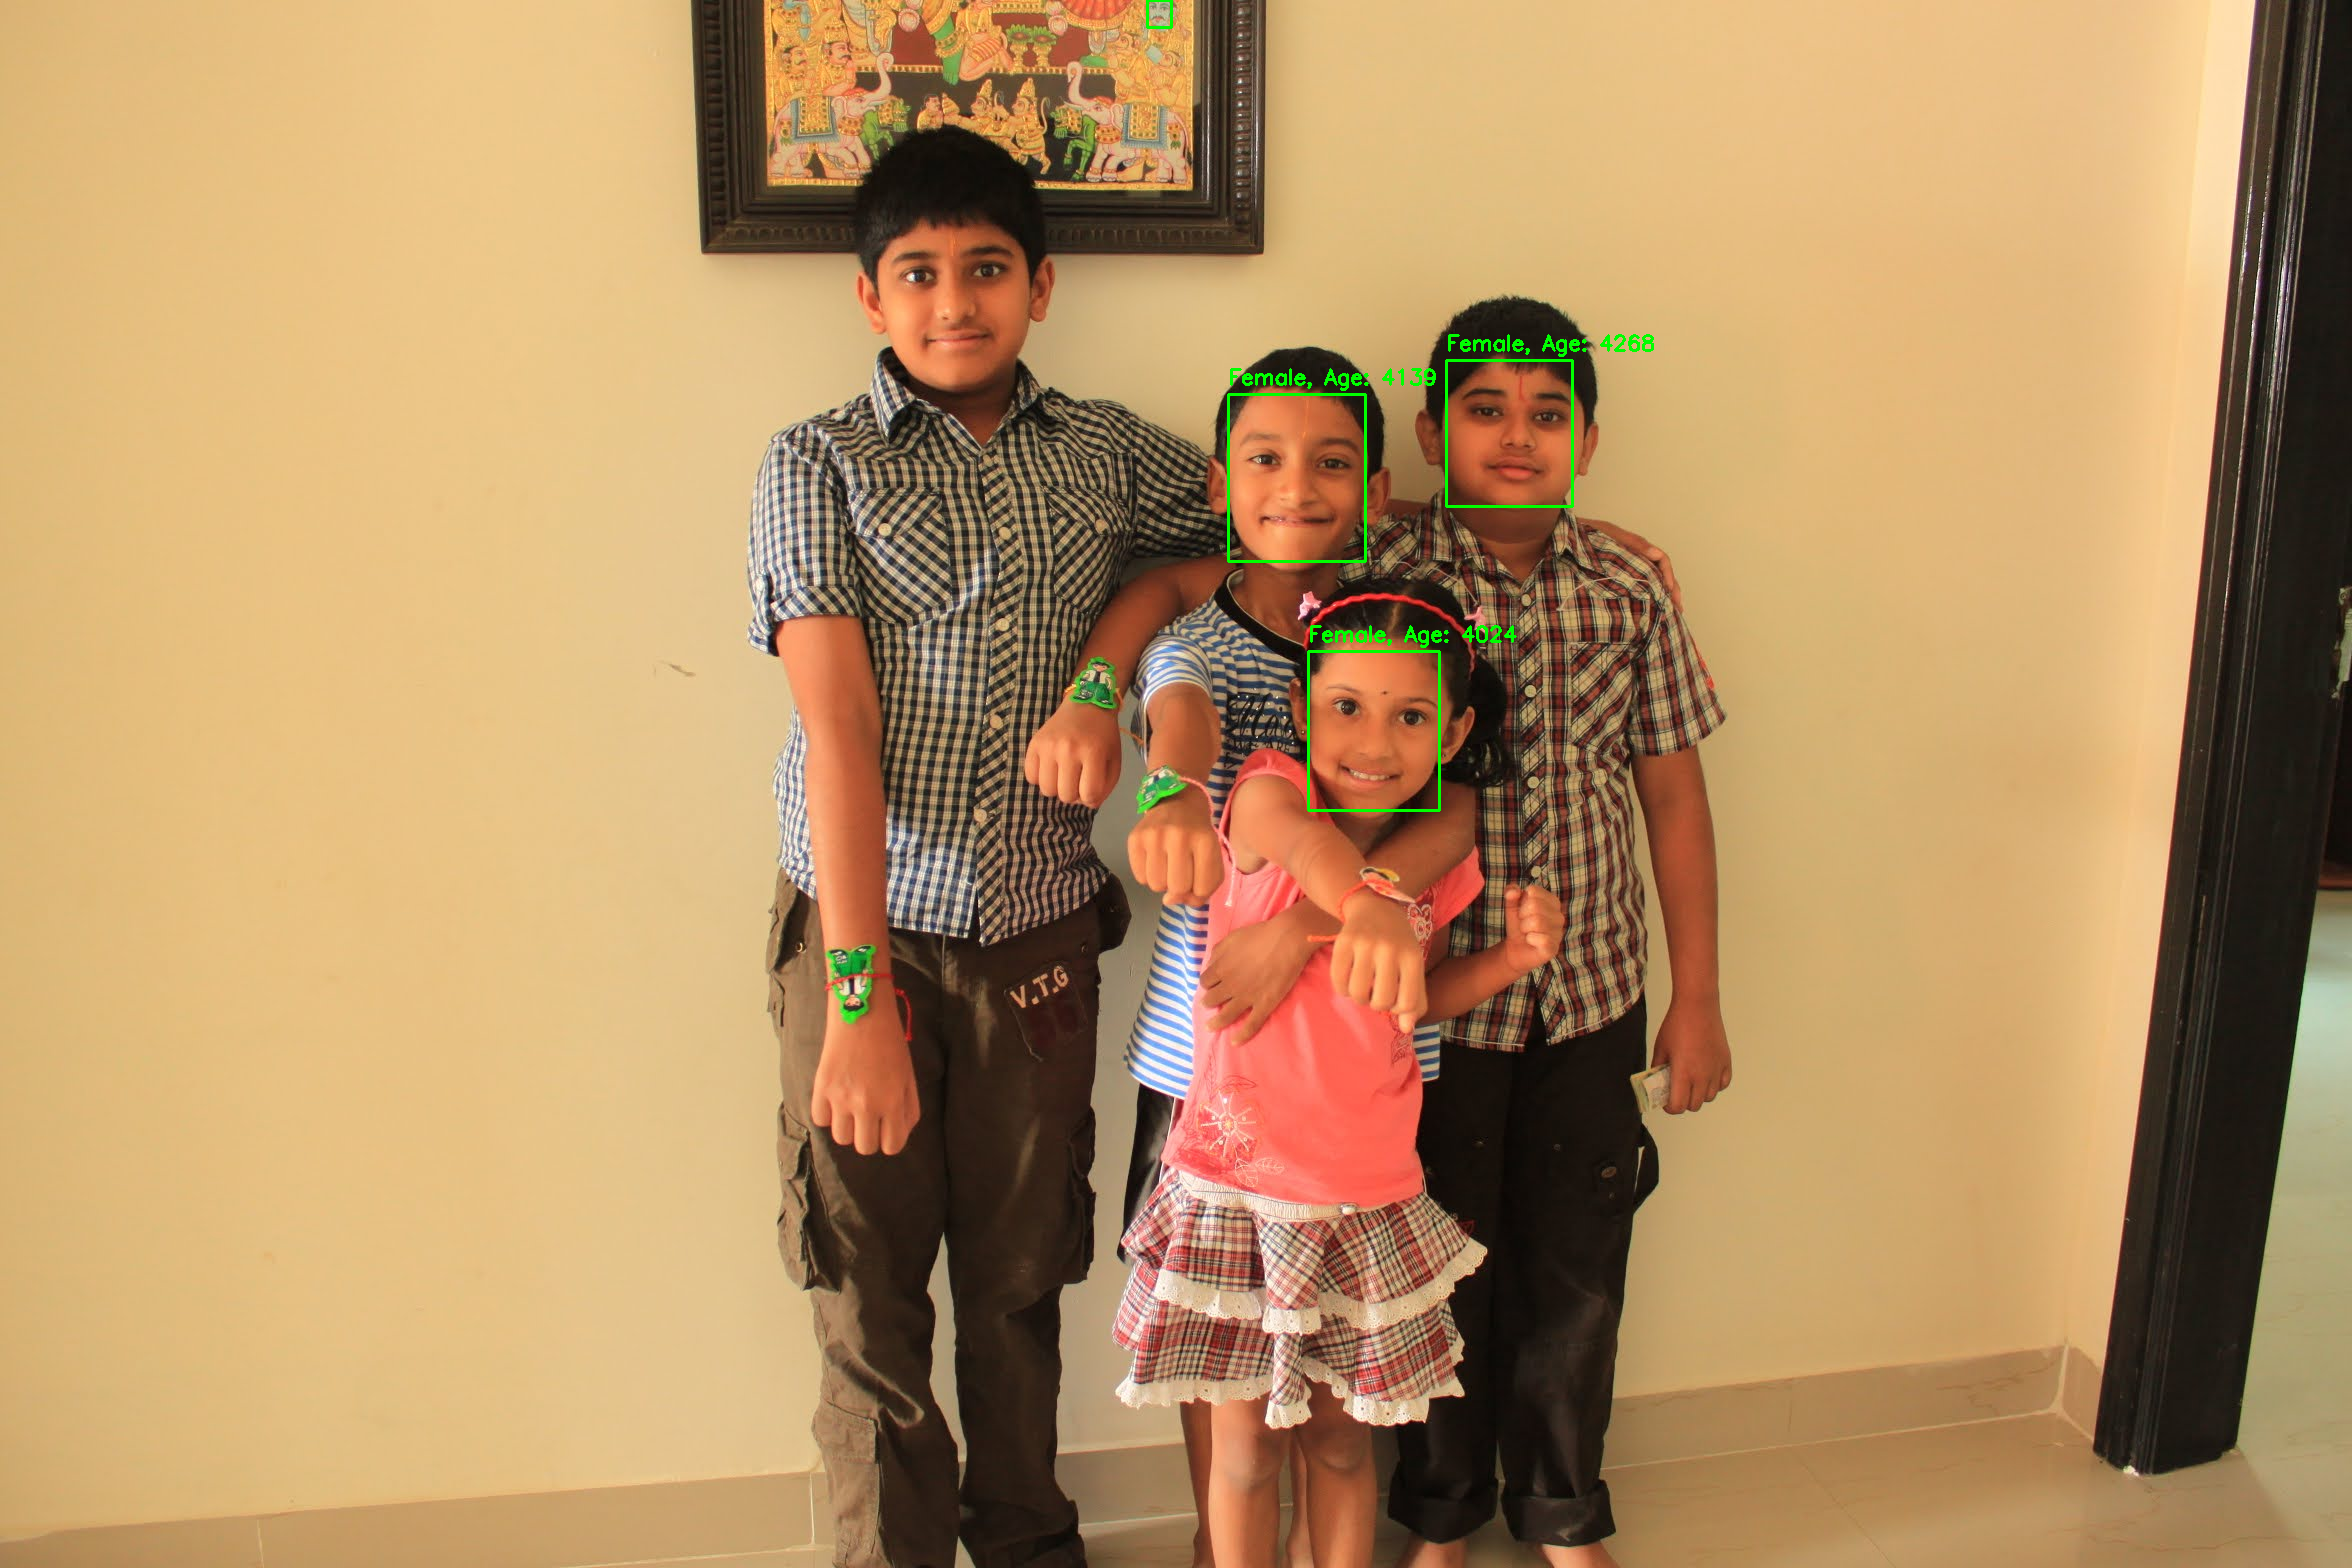

In [ ]:
run_pipeline("/content/IMG_6978.JPG")



In [ ]:
run_pipeline("/content/1000024153.jpg")

Error: Could not read image from /content/1000024153.jpg
